In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In this section, we would like to train an XOR function with the following truth table:-

|inp1 | inp2 | out |
|-|
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |

Let us try with single neuron as before.

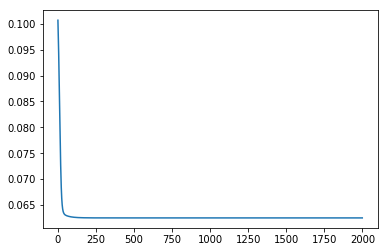

0 0 0.500000000144
0 1 0.500000000144
1 0 0.500000000144
1 1 0.500000000144


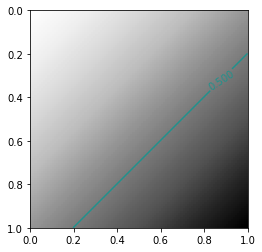

In [6]:
def sigmoid(z):
    return 1.0/(1+np.exp(-z))

inp = [[0, 0], [0, 1], [1, 0], [1, 1]]
outp = [0, 1, 1, 0]

w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()

errors = []
b = np.random.randn()
w1 = np.random.randn()
w2 = np.random.randn()
for i in range(2000):
    del_b = 0
    del_w1 = 0
    del_w2 = 0
    error = 0
    for i in range(4):
        x1 = inp[i][0]
        x2 = inp[i][1]
        e = outp[i]
        
        a = sigmoid(w1*x1 + w2*x2 + b)
    
        del_w1 += (a-e) * a * (1-a) * x1
        del_w2 += (a-e) * a * (1-a) * x2
        del_b += (a-e) * a * (1-a)
        error += (a-e)**2/2
        
    del_w1 /= 4
    del_w2 /= 4
    del_b /= 4
    error /= 4
    
    w1 -= del_w1
    w2 -= del_w2
    b -= del_b
        
    errors.append(error / 2)
    
plt.plot(errors)
plt.show()
for i1 in [0, 1]:
    for i2 in [0, 1]:
        print i1, i2, sigmoid(w1*x1 + w2*x2 + b)
        

x1 = np.arange(0, 1, 0.01)
x2 = np.arange(0, 1, 0.01)
X1, X2 = np.meshgrid(x1, x2)
Z = sigmoid(w1*X1 + w2*X2 + b)
im = plt.imshow(Z, cmap=plt.cm.Greys, extent=(0, 1, 1, 0))
cset = plt.contour(Z, np.array([0.25, 0.5, 0.75]), extent=(0,1,0,1))
plt.clabel(cset)
plt.show()

The problem is that an XOR function requires two partitions whereas a single neuron can only perform a single partition.

![Partition](http://wantee.github.io/assets/images/posts/xor-5d.png)

This brings us to the next part hidden layers. We can use hidden layers to partition the inputs into more than one regions.

Let us look at the code for hidden layers:-

## Hidden layers

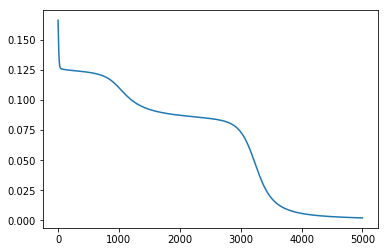

1 1 0 0.0507577983216
1 1 1 0.938985928515
1 1 1 0.938978176445
1 1 0 0.0815911346782


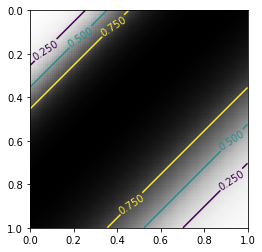

In [29]:
errors = []
w111 = np.random.randn()
w112 = np.random.randn()
w121 = np.random.randn()
w122 = np.random.randn()
b11 = np.random.randn()
b12 = np.random.randn()
w211 = np.random.randn()
w212 = np.random.randn()
b21 = np.random.randn()
for i in range(5000):
    del_w111 = 0
    del_w112 = 0
    del_w121 = 0
    del_w122 = 0
    del_b11 = 0
    del_b12 = 0
    del_w211 = 0
    del_w212 = 0
    del_b21 = 0
    error = 0
    for i in range(4):
        x1 = inp[i][0]
        x2 = inp[i][1]
        e = outp[i]
        
        a11 = sigmoid(w111*x1 + w112*x2 + b11)
        a12 = sigmoid(w121*x1 + w122*x2 + b12)
        a = sigmoid(w211*a11 + w212*a12 + b21)
        error += (0.5 * (a - e)**2)
        del_b21 += (a-e) * a * (1-a)
        del_w211 += a11 * (a-e) * a * (1-a)
        del_w212 += a12 * (a-e) * a * (1-a)
            
        del_b11 += a11 * (1 - a11) * w211 * (a-e) * a * (1-a)
        del_w111 += x1 * a11 * (1 - a11) * w211 * (a-e) * a * (1-a)
        del_w112 += x2 * a11 * (1 - a11) * w211 * (a-e) * a * (1-a)
        
        del_b12 += a12 * (1 - a12) * w212 * (a-e) * a * (1-a)
        del_w121 += x1 * a12 * (1 - a12) * w212 * (a-e) * a * (1-a)
        del_w122 += x2 * a12 * (1 - a12) * w212 * (a-e) * a * (1-a)
    
    w111 -= del_w111/4
    w112 -= del_w112/4
    w121 -= del_w121/4
    w122 -= del_w122/4
    b11 -= del_b11/4
    b12 -= del_b12/4
    w211 -= del_w211/4
    w212 -= del_w212/4
    b21 -= del_b21/4
    errors.append(error / 4)
#print w111, w112, w121, w122, b11, b12, w211, w212, b21
plt.plot(errors)
plt.show()
for i in range(4):
    x1 = inp[i][0]
    x2 = inp[i][1]
    e = outp[i]
    a11 = sigmoid(w111*x1 + w112*x2 + b11)
    a12 = sigmoid(w121*x1 + w122*x2 + b12)
    a = sigmoid(w211*a11 + w212*a12 + b21)
        
    print i1, i2, e, a
    
x1 = np.arange(0, 1, 0.01)
x2 = np.arange(0, 1, 0.01)
X1, X2 = np.meshgrid(x1, x2)
a11 = sigmoid(w111*X1 + w112*X2 + b11)
a12 = sigmoid(w121*X1 + w122*X2 + b12)
Z = sigmoid(w211*a11 + w212*a12 + b21)
im = plt.imshow(Z, cmap=plt.cm.Greys, extent=(0, 1, 1, 0))
cset = plt.contour(Z, np.array([0.25, 0.5, 0.75]), extent=(0,1,0,1))
plt.clabel(cset)
plt.show()

As 